# Data block foundations

In [ ]:
%install '.package(path: "$cwd/FastaiNotebook_07_batchnorm")' FastaiNotebook_07_batchnorm

Installing packages:
	.package(path: "/home/ubuntu/fastai_docs/dev_swift/FastaiNotebook_07_batchnorm")
		FastaiNotebook_07_batchnorm
With SwiftPM flags: []
Working in: /tmp/tmp18mgieaz
Fetching https://github.com/mxcl/Path.swift
Fetching https://github.com/JustHTTP/Just
Completed resolution in 3.17s
Cloning https://github.com/JustHTTP/Just
Resolving https://github.com/JustHTTP/Just at 0.7.1
Cloning https://github.com/mxcl/Path.swift
Resolving https://github.com/mxcl/Path.swift at 0.16.2
Compile Swift Module 'Path' (9 sources)
Compile Swift Module 'Just' (1 sources)
Compile Swift Module 'FastaiNotebook_07_batchnorm' (10 sources)
/home/ubuntu/fastai_docs/dev_swift/FastaiNotebook_07_batchnorm/Sources/FastaiNotebook_07_batchnorm/07_batchnorm.swift:50:15: warning: typealias overriding associated type 'Input' from protocol 'Layer' is better expressed as same-type constraint on the protocol
    typealias Input = Tensor<Scalar>
    ~~~~~~~~~~^~~~~~~~~~~~~~~~~~~~~~
    
TensorFlow.Layer:2:20: n

In [ ]:
import FastaiNotebook_07_batchnorm
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

('inline', 'module://ipykernel.pylab.backend_inline')


In [ ]:
// export
import Path
import TensorFlow
import Python

In [ ]:
let plt = Python.import("matplotlib.pyplot")

## Image ItemList

### Download Imagenette

In [ ]:
//export
let dataPath = Path.home/".fastai"/"data"

In [ ]:
//export
func downloadImagette(path: Path = dataPath) -> Path {
    let url = "https://s3.amazonaws.com/fast-ai-imageclas/imagenette-160.tgz"
    let fname = "imagenette-160"
    let file = path/fname
    try! path.mkdir(.p)
    if !file.exists {
        downloadFile(url, dest:(path/"\(fname).tgz").string)
        _ = shellCommand("/bin/tar", ["-xzf", (path/"\(fname).tgz").string, "-C", path.string])
    }
    return file
}

In [ ]:
let path = downloadImagette()

In [ ]:
print(path.ls())

[Path.Entry(kind: Path.Entry.Kind.directory, path: Path(/home/ubuntu/.fastai/data/imagenette-160/val)), Path.Entry(kind: Path.Entry.Kind.directory, path: Path(/home/ubuntu/.fastai/data/imagenette-160/train)), Path.Entry(kind: Path.Entry.Kind.directory, path: Path(/home/ubuntu/.fastai/data/imagenette-160/models))]


To be able to look at what's inside a directory from a notebook, we add the `.ls` method to `Path` with a monkey-patch.

In [ ]:
print((path/"val").ls())

[Path.Entry(kind: Path.Entry.Kind.directory, path: Path(/home/ubuntu/.fastai/data/imagenette-160/val/n03888257)), Path.Entry(kind: Path.Entry.Kind.directory, path: Path(/home/ubuntu/.fastai/data/imagenette-160/val/n03445777)), Path.Entry(kind: Path.Entry.Kind.directory, path: Path(/home/ubuntu/.fastai/data/imagenette-160/val/n03425413)), Path.Entry(kind: Path.Entry.Kind.directory, path: Path(/home/ubuntu/.fastai/data/imagenette-160/val/n01440764)), Path.Entry(kind: Path.Entry.Kind.directory, path: Path(/home/ubuntu/.fastai/data/imagenette-160/val/n03028079)), Path.Entry(kind: Path.Entry.Kind.directory, path: Path(/home/ubuntu/.fastai/data/imagenette-160/val/n02979186)), Path.Entry(kind: Path.Entry.Kind.directory, path: Path(/home/ubuntu/.fastai/data/imagenette-160/val/n03394916)), Path.Entry(kind: Path.Entry.Kind.directory, path: Path(/home/ubuntu/.fastai/data/imagenette-160/val/n02102040)), Path.Entry(kind: Path.Entry.Kind.directory, path: Path(/home/ubuntu/.fastai/data/imagenette-160

Let's have a look inside a class folder (the first class is tench):

In [ ]:
let pathTench = path/"val"/"n01440764"

In [ ]:
let imgFn = pathTench.ls()[0].path
imgFn.string

"/home/ubuntu/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00017995.JPEG"


In [ ]:
let imgBytes = Raw.readFile(filename: StringTensor(imgFn.string))
let decodedImg = Raw.decodeJpeg(contents: imgBytes, channels: 3, dctMethod: "") 

In [ ]:
let np = Python.import("numpy")

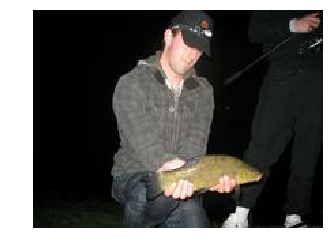

None


In [ ]:
let numpyImg = decodedImg.makeNumpyArray()
plt.imshow(numpyImg) 
plt.axis("off")
plt.show()